# Practical AI Model Deployment with TensorFlow Lite
**Course: AI & Robotics - Data Science Applications**

**Lab Title: Converting and Deploying AI Models using TensorFlow Lite**

**Objective:**
- Set up your Python environment for TensorFlow Lite.
- Train a simple neural network on the MNIST dataset.
- Convert the trained model into TensorFlow Lite format.
- Load and test the converted model using the TensorFlow Lite Interpreter.



## Part 1: Setting Up the Development Environment
### Step 1: Verify Python and TensorFlow Installation

In [1]:
!python --version
!pip show tensorflow

Python 3.12.7
Name: tensorflow
Version: 2.16.2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/Naomi/opt/anaconda3/lib/python3.12/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing-extensions, wrapt
Required-by: 


### Step 2: Install Jupyter Notebook (if working locally)

!pip install jupyter
!jupyter notebook

- I skipped step 2 and moved on to Part 2: step 3

## Part 2: Creating and Training an AI Model
### Step 3: Load the MNIST Dataset

2025-02-04 22:42:58.992507: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


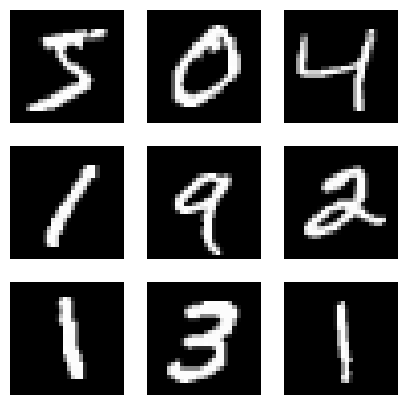

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data (scale pixel values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Show sample images
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

### Step 4: Define and Train a Neural Network

In [34]:
import tensorflow as tf

# Define model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Save model using the correct method for TensorFlow Lite
model.export("saved_mnist_model")  # Use export() instead of save()

print("✅ Model training complete and saved in 'saved_mnist_model' format")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8791 - loss: 0.4292 - val_accuracy: 0.9595 - val_loss: 0.1313
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9643 - loss: 0.1208 - val_accuracy: 0.9713 - val_loss: 0.0946
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9769 - loss: 0.0777 - val_accuracy: 0.9675 - val_loss: 0.0951
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9836 - loss: 0.0548 - val_accuracy: 0.9724 - val_loss: 0.0818
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9863 - loss: 0.0439 - val_accuracy: 0.9779 - val_loss: 0.0682
INFO:tensorflow:Assets written to: saved_mnist_model/assets


INFO:tensorflow:Assets written to: saved_mnist_model/assets


Saved artifact at 'saved_mnist_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor_50')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  5387698000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5387697808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5387694352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5394298448: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Model training complete and saved in 'saved_mnist_model' format


## Part 3: Converting and Saving the Model
### Step 5: Convert the Model to TensorFlow Lite Format

In [36]:
# Load model from saved format
converter = tf.lite.TFLiteConverter.from_saved_model("saved_mnist_model")

# Convert model
tflite_model = converter.convert()

# Save the converted model
with open("mnist_model.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Model successfully converted and saved as mnist_model.tflite")

✅ Model successfully converted and saved as mnist_model.tflite


W0000 00:00:1738733837.494124   27546 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1738733837.494192   27546 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-02-04 23:37:17.495246: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_mnist_model
2025-02-04 23:37:17.495892: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-02-04 23:37:17.495907: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_mnist_model
2025-02-04 23:37:17.503224: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2025-02-04 23:37:17.503897: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-02-04 23:37:17.533804: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: saved_mnist_model
2025-02-04 23:37:17.543289: I tensorflow/cc/saved_model/loader

## Part 4: Loading and Running Inference with TensorFlow Lite
### Step 6: Load the Converted Model Using TensorFlow Lite Interpreter

In [41]:
# Load TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='mnist_model.tflite')
interpreter.allocate_tensors()

# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print('Input Details:', input_details)
print('Output Details:', output_details)

Input Details: [{'name': 'serving_default_keras_tensor_50:0', 'index': 0, 'shape': array([ 1, 28, 28], dtype=int32), 'shape_signature': array([-1, 28, 28], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output Details: [{'name': 'StatefulPartitionedCall_1:0', 'index': 9, 'shape': array([ 1, 10], dtype=int32), 'shape_signature': array([-1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


### Step 7: Perform Inference with TensorFlow Lite

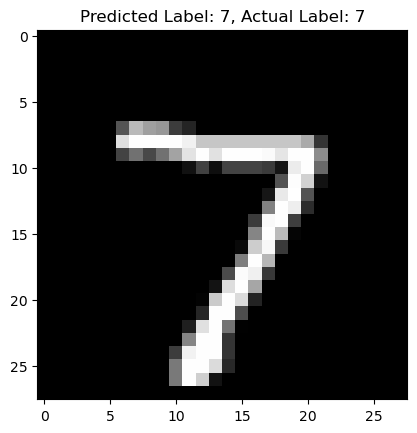

In [44]:
# Select a test image
test_image = x_test[0].astype(np.float32)  # Ensure data type matches model input
test_image = np.expand_dims(test_image, axis=0)  # Reshape for model input

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], test_image)

# Run inference
interpreter.invoke()

# Get the prediction
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_label = np.argmax(output_data)

# Display the image and prediction
plt.imshow(x_test[0], cmap='gray')
plt.title(f'Predicted Label: {predicted_label}, Actual Label: {y_test[0]}')
plt.show()